## Задача
Перед нами завдання обрати найкращого секретаря серед n аплікантів, які приходять по черзі. Після співбесіди з кандидатом ми маємо зробити вибір: найняти його чи продовжити пошуки. У випадку найму кандидат погодиться з ймовірністю 100%, якщо ж ми його не наймаємо — він назавжди втрачений.

Нас цікавить лише швидкість друку кандидатів, тому на співбесіді ми проводимо з ними тест. Ба більше, ми знаємо розподіл швидкості друку у популяції, себто знаючи скільки слів на хвилину друкує кандидат ми одразу встановлюємо в якому персентилі відносно популяції він перебуває.

В котрому персентилі має знаходитись k-ий кандидат аби ми його найняли замість сподіватись на кращого кандидата пізніше?

### Припущення
- Стратегія не враховує інформацію про попередніх, вже відсіяних кандидатів. Тобто стратегія -- це відображення 
$$(F, k) \rightarrow d$$
де $F$ -- функція розподілу швидкості друку в популяції, $k$ -- кількість кандидатів, що ще залишились окрім поточного, $d$ -- поріг прийняття поточного кандидату. Тобто поточний кандидат зі швидкістю друку $x$ приймається якщо $F(x) \geq d$.
- Треба знайти стратегію, яка максимізує ймовірність вибору найкращого кандидату з тих, що залишились, за умови, що на наступних кроках буде застосовуватись оптимальна в такому ж сенсі стратегія 
- Щоб не розглядати окремо випадки рівностей, будемо вважати, що $F$ задає неперервний розподіл

## Розв'язок

Оскільки в нас рекурсивне означення оптимальної стратегії, визначемо її спочатку на крайових випадках. Нехай $F$ фіксоване, 
- $d_k = Strategy(F, k)$, 
- $p_k$ -- ймовірність обрати найкращого кандидата з тих, що залишились, використовуючи оптимальну стратегію на $k$ кроці.

Зрозуміло, що при $k=0$, тобто коли залишився єдиний кандидат, $d_0 = 0$, $p_0 = 1$.

Розглянемо далі випадок $k=1$, тобто коли залишився один кандидат, окрім поточного. Нехай $\alpha$ -- швидкість друку поточного кандидату (її ми спостерігаємо), $x_1$ -- швидкість кандидату, що залишився. В нас є вибір -- обрати поточного кандидата, або перейти до наступного (якого ми оберемо тоді автоматично). Ймовірність обрати найкращого з наявних в цих випадках буде:
- $P\left(\text{choose the best one} | \text{choose } \alpha \right) = P(\alpha > x_1) = F(\alpha)$
- $P\left(\text{choose the best one} | \text{skip } \alpha \right) = P(\alpha < x_1) = 1 - F(\alpha)$

$F(\alpha) \geq 1 - F(\alpha) \Leftrightarrow F(\alpha) \geq \frac12$

Отже, для максимізації ймовірності обрати найкращого кандидата, в цьому випадку треба обирати поточного, якщо $F(\alpha) \geq \frac12$ і переходити до наступного в протилежному випадку. Таким чином $d_1 = \frac12$.

Порахуємо, яка ймовірність обрати найкращого кандидата при цій стратегії. Для цього нехай швидкість поточного кандидата, $x$ -- це також випадкова величина з розподілу, що задається $F$. Тоді, беручи до уваги стратегію,

$p_1 = P(\text{choose the best one}) = P\left(x > x_1 | x \text{ was chosen}\right) \cdot P(x \text{ was chosen}) + P\left(x_1 > x | x \text{ was skipped}\right) \cdot P(x \text{ was skipped}) $

$= P\left(x > x_1 | F(x) \geq \frac12 \right) \cdot P(F(x) \geq \frac12) + P\left(x_1 > x | F(x) < \frac12 \right) \cdot P(F(x) < \frac12 )$

тут помітимо, що якщо $F_{\xi}$ -- функція розподілу випадкової величини $\xi$, то $F_{\xi} (\xi)$ -- випадкова величина, і $F_{\xi}(\xi) \sim U(0, 1)$

$= (1\cdot \frac12 + \frac12\cdot\frac12)\cdot \frac12 + (1\cdot \frac12 + \frac12\cdot\frac12)\cdot \frac12 = \frac34$

Перевіримо ймовірність
 

In [1]:
import scipy
import numpy as np

In [2]:
distr = scipy.stats.skewnorm(a=2, loc=20, scale=3)

In [3]:
d1 = 1 / 2
n = 1000000
A = distr.rvs(size=(n, 2))
chosen = A[:, 0] * ((A[:, 0]) >= distr.ppf(d1)) + A[:, 1] * (A[:, 0] < distr.ppf(d1))

In [4]:
(chosen == A.max(axis=1)).mean()

0.749955

Переходимо тепер до загального випадку (крок індукції): окрім поточного кандидату залишилось $k$ інших, з випадковими швидкостями $x_1, x_2, \ldots x_k$, поточний кандидат має швидкість $\alpha$. Маємо 

- $P\left(\text{choose the best one} | \text{choose } \alpha \right) = P(\alpha > max(x_1, \ldots, x_k)) = P(\alpha > x_1, \ldots, \alpha > x_k) = \prod\limits_{i=1}^k P(x_i < \alpha) = F(\alpha)^k$
- $P\left(\text{choose the best one} | \text{skip } \alpha \right) = P(\alpha < max(x_1, \ldots, x_k)) \cdot p_{k-1} = (1 - F(\alpha)^k) \cdot p_{k-1}$

$F(\alpha)^k \geq (1-F(\alpha)^k)\cdot p_{k-1} \Leftrightarrow F(\alpha)^k \cdot (p_{k-1} + 1) \geq p_{k-1} \Leftrightarrow F(k) \geq \left(\frac{p_{k-1}}{1+p_{k-1}}\right)^\frac1k$.

 Отже, $d_k = \left(\frac{p_{k-1}}{1+p_{k-1}}\right)^\frac1k$

Відповідна ймовірність виграшу:

$p_k = P(\text{choose the best one})$ 

$ = P\left(x > max(x_1, \ldots, x_k) | x \text{ was chosen}\right) \cdot P(x \text{ was chosen}) + p_{k-1}\cdot P\left(x < max(x_1,\ldots, x_k) |x \text{ was skipped}\right) \cdot P(x \text{ was skipped}) $

$ = P\left(x > max(x_1, \ldots, x_k) | F(x) \geq d_k \right) \cdot P(F(x)\geq d_k) + p_{k-1}\cdot P\left(x < max(x_1,\ldots, x_k) |F(x) < d_k\right) \cdot P(F(x) < d_k) $

$ = P\left(x > x_1 | F(x) \geq d_k \right)^k \cdot (1-d_k) + p_{k-1}\cdot \left(1-P\left(x > x_1 |F(x) < d_k\right)^k\right) \cdot d_k $


Порахуємо окремо 

$P\left(x > x_1 | F(x) \geq d_k \right) $

$= P\left(x > x_1 | F(x) \geq d_k, F(x_1) \geq d_k \right)\cdot P(F(x_1)\geq d_k) + P\left(x > x_1 | F(x) \geq d_k, F(x_1) < d_k \right)\cdot P(F(x_1)< d_k) $

$= \frac12(1-d_k) + d_k = \frac12 (1 + d_k)$

$P\left(x > x_1 | F(x) < d_k \right) $

$= P\left(x > x_1 | F(x) < d_k, F(x_1) < d_k \right)\cdot P(F(x_1)<d_k) + P\left(x > x_1 | F(x) <d_k, F(x_1) \geq d_k \right)\cdot P(F(x_1)\geq d_k) $

$= \frac12 d_k$

Підставляючи, маємо 

$p_k = \left(\frac{d_k + 1}{2}\right)^k \cdot (1-d_k) + p_{k-1}\cdot \left(1-\left(\frac{1}{2} d_k\right)^k\right) \cdot d_k $


Отже, оптимальний поріг для вибору поточного кандидату задається рекурентно співвідношеннями

$d_0 = 0, p_0 = 1$

$d_k = \left(\frac{p_{k-1}}{1+p_{k-1}}\right)^{1/k}, k>0$

$p_k = \frac{1}{2^k}\left(1+\left(\frac{p_{k-1}}{1+p_{k-1}}\right)^{1/k}\right)^k \cdot \left(1-\left(\frac{p_{k-1}}{1+p_{k-1}}\right)^{1/k}\right) + p_{k-1}\cdot \left(\frac{p_{k-1}}{1+p_{k-1}}\right)^{1/k}\cdot\left(1-\frac{1}{2^k} \frac{p_{k-1}}{1+p_{k-1}}\right) , k>0$

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
dk = [0]
pk = [1]
N = 25
ks = np.arange(N)

for k in ks[1:]:
    dk.append((pk[-1] / (1 + pk[-1]))**(1/ k))
    pk.append(
        ((dk[-1] + 1) / 2) ** k * (1 - dk[-1]) + dk[-1] * pk[-1] * (1 - (dk[-1] / 2) ** k)
    )

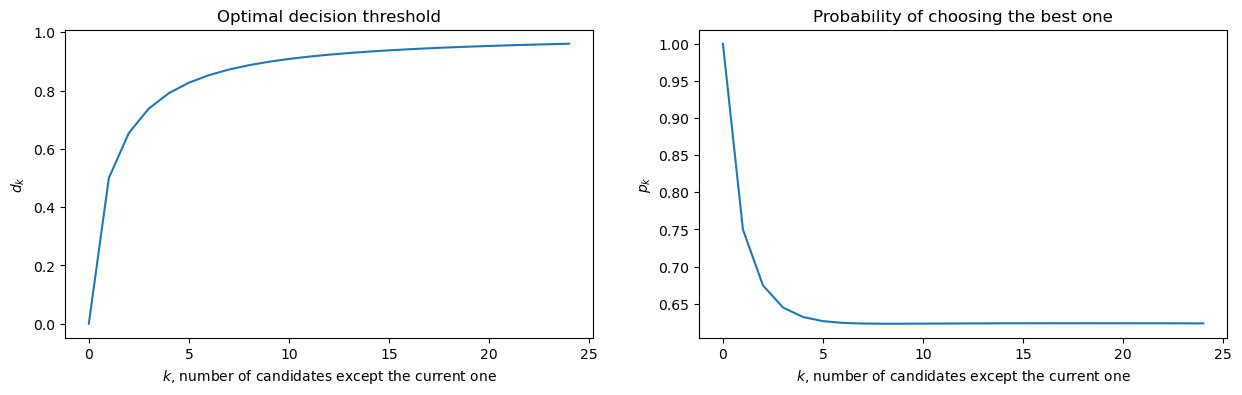

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

ax = axs[0]
ax.plot(ks, dk)
ax.set_xlabel(r"$k$, number of candidates except the current one")
ax.set_ylabel(r"$d_k$")
ax.set_title("Optimal decision threshold")

ax = axs[1]
ax.plot(ks, pk)
ax.set_xlabel(r"$k$, number of candidates except the current one")
ax.set_ylabel(r"$p_k$")
ax.set_title("Probability of choosing the best one")

plt.show()

In [8]:
n = 10000000
N = 5
A = distr.rvs(size=(n, N))

In [9]:
chosen = np.zeros(n) 

In [10]:
for i in range(N):
    k = N - i - 1
    passed = A[:, k] >= distr.ppf(dk[k])
    chosen[(chosen == 0) & passed] = A[passed & (chosen == 0), k]

In [11]:
(chosen == A.max(axis=1)).mean()

0.6190005